In [2]:
from owlready2 import *
import pandas as pd

In [6]:
import sys
sys.path.append('../code')
from functions import *

In [9]:
# Load the ontology
onto = get_ontology("../ontology/panres_v2.owl").load()

# Inspect the Ontology

Visualization saved as specific_classes_visualization.png


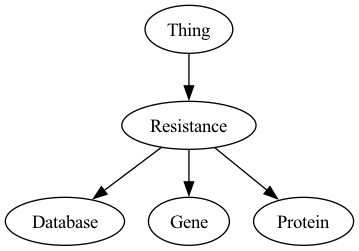

In [23]:
from graphviz import Digraph
import owlready2
from IPython.display import Image, display

def visualize_specific_classes(onto, class_names, output_file="specific_classes_visualization"):
    dot = Digraph(comment='Specific Classes Visualization')
    
    def add_class_and_relationships(cls):
        dot.node(cls.name, cls.name)
        for parent in cls.is_a:
            if isinstance(parent, owlready2.ThingClass):
                dot.edge(parent.name, cls.name)
                dot.node(parent.name, parent.name)
    
    # Add nodes and edges for specified classes
    for class_name in class_names:
        cls = onto[class_name]
        add_class_and_relationships(cls)
    
    # Save and render the graph
    dot.format = 'png'
    dot.render(output_file, format='png', cleanup=True)
    print(f"Visualization saved as {output_file}.png")
    
    display(Image(filename=output_file + '.png'))

# Usage
specific_classes = ["Resistance", "Database", "Gene", "Protein"]
visualize_specific_classes(onto, specific_classes)

# Queries about antimicrobial resistance

## Get antimicrobial resistance classes

In [4]:
get_subclasses(onto, class_name='AntibioticResistanceClass')

,match
0,AntibioticResistanceClass
1,Aminocoumarin
2,Aminoglycoside
3,Antimycobacterial
4,Beta_Lactam
5,Fluoroquinolone
6,Folate_Pathway_Antagonist
7,Fosfomycin
8,Glycopeptide
9,Ionophore


In [6]:
summarise_classes(onto, class_name='Beta_Lactam')


,Class,type,n_genes
0,AntibioticResistanceClass,AntibioticResistance,0
1,Aminocoumarin,AntibioticResistanceClass,23
2,Aminoglycoside,AntibioticResistanceClass,1299
3,Antimycobacterial,AntibioticResistanceClass,944
4,Beta_Lactam,AntibioticResistanceClass,6538
5,Fluoroquinolone,AntibioticResistanceClass,565
6,Folate_Pathway_Antagonist,AntibioticResistanceClass,1446
7,Fosfomycin,AntibioticResistanceClass,84
8,Glycopeptide,AntibioticResistanceClass,307
9,Ionophore,AntibioticResistanceClass,2


## Get subclasses of a specific resistance class  (i.e., phenotypes)

In [7]:
get_subclasses(onto = onto, class_name='Polymyxin')

,match
0,Polymyxin
1,Colistin
2,Polymyxin_B
3,Spr_206


In [10]:
summarise_classes(onto, class_name='Polymyxin')

,Class,type,n_genes
0,Polymyxin,AntibioticResistanceClass,466
1,Colistin,AntibioticResistancePhenotype,108
2,Polymyxin_B,AntibioticResistancePhenotype,274
3,Spr_206,AntibioticResistancePhenotype,84
